In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = '../image/ImageSimilarity/lena.jpg'

## 掩膜

### 概念

掩膜是二值化图像（mask）对图像的局部遮挡。用选定的图像或物体，对处理的图像（全部或局部）进行遮挡，以此控制图像处理区域或处理过程。用于覆盖的图像或物体称为掩膜。掩膜一般是有0和1组成的二值图像。

### 作用

1. 提取ROI区域
2. 屏蔽作用
3. 结构特征提取，用相似性变量或图像匹配方法检测和提取图像中与掩膜相似的结构特征
4. 特殊性图像的制作

### 边界填充

可以使用```cv2.copyMakeBorder() ```函数：
```python
def copyMakeBorder(src, top, bottom, left, right, borderType, dst=None, value=None):
```

参数解释：

src：输入图像
top，buttom，left，right 对应边界的像素数目（分别为图像上面， 下面， 左面，右面填充边界的长度）
borderType 要添加哪种类型的边界，类型如下：
　　　　——cv2.BORDER_CONSTANT 添加有颜色的常数值边界，还需要下一个参数（value）

　　　　——cv2.BORDER_REFLECT 边界元素的镜像，反射法，即以最边缘的像素为对称轴。比如: fedcba|abcdefgh|hgfedcb

　　　　——cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT跟BORDER_REFLECT类似，但是由区别。例如: gfedcb|abcdefgh|gfedcba

　　　　——cv2.BORDER_REPLICATE 复制法，重复最后一个元素。例如: aaaaaa|abcdefgh|hhhhhhh

　　　　——cv2.BORDER_WRAP 不知道怎么说了, 就像这样: cdefgh|abcdefgh|abcdefg

value 边界颜色，通常用于常量法填充中，即边界的类型是 cv2.BORDER_CONSTANT，

In [1]:

# 读取图片
img = cv2.imread('../image/ImageSimilarity/lena.jpg')
# img = cv2.imread('lena.jpg')  # (263, 263, 3)
# print(img.shape)
 
 
# 各个边界需要填充的值, 为了展示效果，这里填充的大一些
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)
 
# 复制法   重复边界，填充  即复制最边缘像素
replicate = cv2.copyMakeBorder(img, top_size, bottom_size,
                               left_size, right_size,
                               borderType=cv2.BORDER_REPLICATE)
 
# 反射法    反射边界，填充 即对感兴趣的图像中的像素在两边进行复制，
#           例如 fedcba|abcdefgh|hgfedcb
reflect = cv2.copyMakeBorder(img, top_size, bottom_size,
                               left_size, right_size,
                               borderType=cv2.BORDER_REFLECT)
 
# 反射101边界法  反射101边界，填充 这个是以最边缘为轴，对称 ，
#           例如 gfedcb|abcdefg|gfedcba
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size,
                               left_size, right_size,
                               borderType=cv2.BORDER_REFLECT_101)
 
# 外包装法  填充 
#           例如  cdefgh|abcdefgh|abcdegf
wrap = cv2.copyMakeBorder(img, top_size, bottom_size,
                               left_size, right_size,
                               borderType=cv2.BORDER_WRAP)
 
# 常量法，常数值填充 ，常量值可以自己设定  value=0
constant = cv2.copyMakeBorder(img, top_size, bottom_size,
                               left_size, right_size,
                               borderType=cv2.BORDER_CONSTANT,
                              value=(0, 255, 0))
 
plt.subplot(231)
plt.imshow(img, 'gray')
plt.title('origin')
 
plt.subplot(232)
plt.imshow(replicate, 'gray')
plt.title('replicate')
 
plt.subplot(233)
plt.imshow(reflect, 'gray')
plt.title('reflect')
 
plt.subplot(234)
plt.imshow(reflect101, 'gray')
plt.title('reflect101')
 
plt.subplot(235)
plt.imshow(wrap, 'gray')
plt.title('wrap')
 
plt.subplot(236)
plt.imshow(constant, 'gray')
plt.title('constant')
 
plt.show()

### 图像二值化

二值化的核心思想是，设定阈值，大于阈值的为0即黑色，小于阈值的为255即白色。阈值可以固定也可以是自适应。自适应阈值一般为一点像素与这点为中序的区域像素平均值或者高斯分布加权和的比较，其中可以设置一个差值也可以不设置。图像的阈值化旨在提取图像中的目标物体，将背景以及噪声区分开来。通常会设定一个阈值T，通过T将图像的像素分为两类：大于T的像素群和小于T的像素群。灰度转换处理后的图像中，每个像素都只有一个灰度值，其大小表示明暗程度。所谓图像的二值化 ，就是将图像上的像素点的灰度值设置为0或255，也就是将整个图像呈现出明显的只有黑和白的视觉效果。一幅图像包括目标物体、背景还有噪声，要想从多值的数字图像中直接提取出目标物体。

全局阈值就是一幅图像包括目标物体、背景还有噪声，要想从多值的数字图像中直接提取出目标物体；常用的方法就是设定一个阈值T，用T将图像的数据分成两部分：大于T的像素群和小于T的像素群。这是研究灰度变换的最特殊的方法，称为图像的二值化（Binarization）。局部阈值就是当同一幅图像上的不同部分的具有不同亮度时。这种情况下我们需要采用自适应阈值。此时的阈值是根据图像上的每一个小区域计算与其对应的阈值。因此在同一幅图像上的不同区域采用的是不同的阈值，从而使我们能在亮度不同的情况下得到更好的结果。

应用场景：生物学中的细胞图分割，交通领域的车牌设计等。在文化应用领域中，通过二值化处理将所需民族文物图像转换为黑白两色图，从而为后面的图像识别提供更好的支撑作用。

### 全局阈值

```python
threshold(src, thresh, maxval, type, dst=None)
```
1. 参数 src  指原图像，原图像应该是灰度图，只能输入单通道图像
2. 参数 thresh  指用来对像素值进行分类的阈值
3. 参数 maxval 指当像素值高于（有时是小于，根据 type 来决定）阈值时应该被赋予的新的像素值，在二元阈值THRESH_BINARY和逆二元阈值THRESH_BINARY_INV中使用的最大值 
4. 参数 dst 指不同的不同的阈值方法，这些方法包括以下五种类型：
    - cv2.THRESH_BINARY：超过阈值部分取 maxval（最大值），否则取 0
    - cv2.THRESH_BINARY_INV：THRESH_BINARY 的反转
    - cv2.THRESH_TRUNC：大于阈值部分设为阈值，否则不变
    - cv2.THRESH_TOZERO：大于阈值部分不改变，否则设为零
    - cv2.THRESH_TOZERO_INV：THRESH_TOZERO 的反转

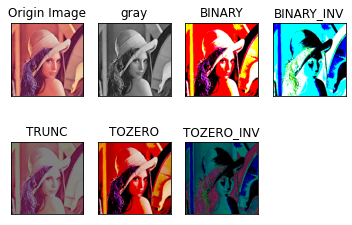

In [5]:
def parse_thresh(path):
    img = cv2.imread(path)  # 读取原始照片
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
    ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
    ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
 
    titles = ['Origin Image', 'gray', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']  # 标题
    images = [img, gray, thresh1, thresh2, thresh3, thresh4, thresh5]  # 对应的图
 
    for i in range(7):  # 画7次图
        plt.subplot(2, 4, i + 1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
 
    plt.show()

parse_thresh('../image/ImageSimilarity/lena.jpg')

### 自适应阈值
```python
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C, dst=None)
```

1. 参数 src 指原图像，原图像应该是灰度图。
2. 参数 x 指当像素值高于（有时是小于）阈值时应该被赋予的新的像素值
3. 参数 adaptive_method 参数为：
    - CV_ADAPTIVE_THRESH_MEAN_C
    - CV_ADAPTIVE_THRESH_GAUSSIAN_C
4. 参数 threshold_type 指取阈值类型：必须是下者之一
    - CV_THRESH_BINARY
    - CV_THRESH_BINARY_INV
5. 参数 block_size 指用来计算阈值的象素邻域大小: 3, 5, 7, …
6. 参数 param1 指与方法有关的参数。
    - 对方法CV_ADAPTIVE_THRESH_MEAN_C 和 CV_ADAPTIVE_THRESH_GAUSSIAN_C， 它是一个从均值或加权均值提取的常数, 尽管它可以是负数。
    - 对方法CV_ADAPTIVE_THRESH_MEAN_C，先求出块中的均值，再减掉param1。
    - 对方法 CV_ADAPTIVE_THRESH_GAUSSIAN_C ，先求出块中的加权和(gaussian)， 再减掉param1。

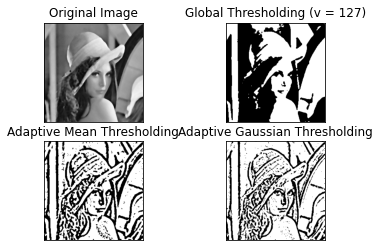

In [7]:
import cv2
from matplotlib import pyplot as plt
#详细说明参考上方例子
 
img = cv2.imread(image_path,0)
img = cv2.medianBlur(img,5)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
 
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu二值化

#### 原理
OTSU 算法是由日本学者 OTSU 于 1979 年提出的一种对图像进行二值化的高效算法。OTSU算法又叫大津算法，其本质是最大类间方差法。它的原理是利用阈值将原图像分为前景，背景两个图像。
- 前景：用 n1，csum，m1 来表示在当前阈值下的前景的点数，质量距，平均灰度。
- 背景：用n2，sum-csum，m2 来表示在当前阈值下的背景的点数，质量距，平均灰度。

当取最佳阈值时，背景应该与前景差别最大，关键在于如何选择衡量差别的标准，而在otsu算法中这个衡量差别的标准就是最大类间方差。

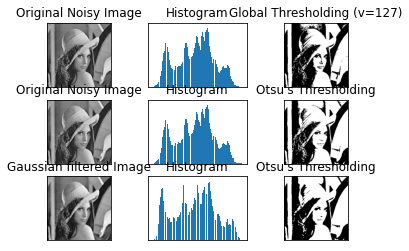

In [8]:
import cv2
from matplotlib import pyplot as plt
 
img = cv2.imread(image_path,0)
 
# 设127 为全局阈值
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# 直接使用 Otsu 二值化
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# 先使用一个 5x5 的高斯核除去噪音，然后再使用 Otsu 二值化
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
 
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()